## Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,plot_roc_curve,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# shape of data set
df.shape

(1599, 12)

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Checking null values

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking skewness in dataset

In [6]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

There is skewness in some columns.

### Statistical Summary

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


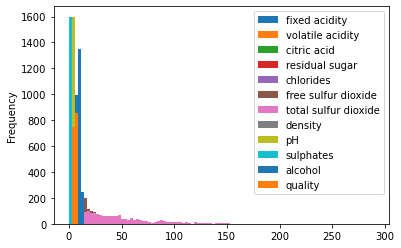

In [8]:
df.plot(kind= 'hist', bins=100)
plt.show()


Distribution Plot :-



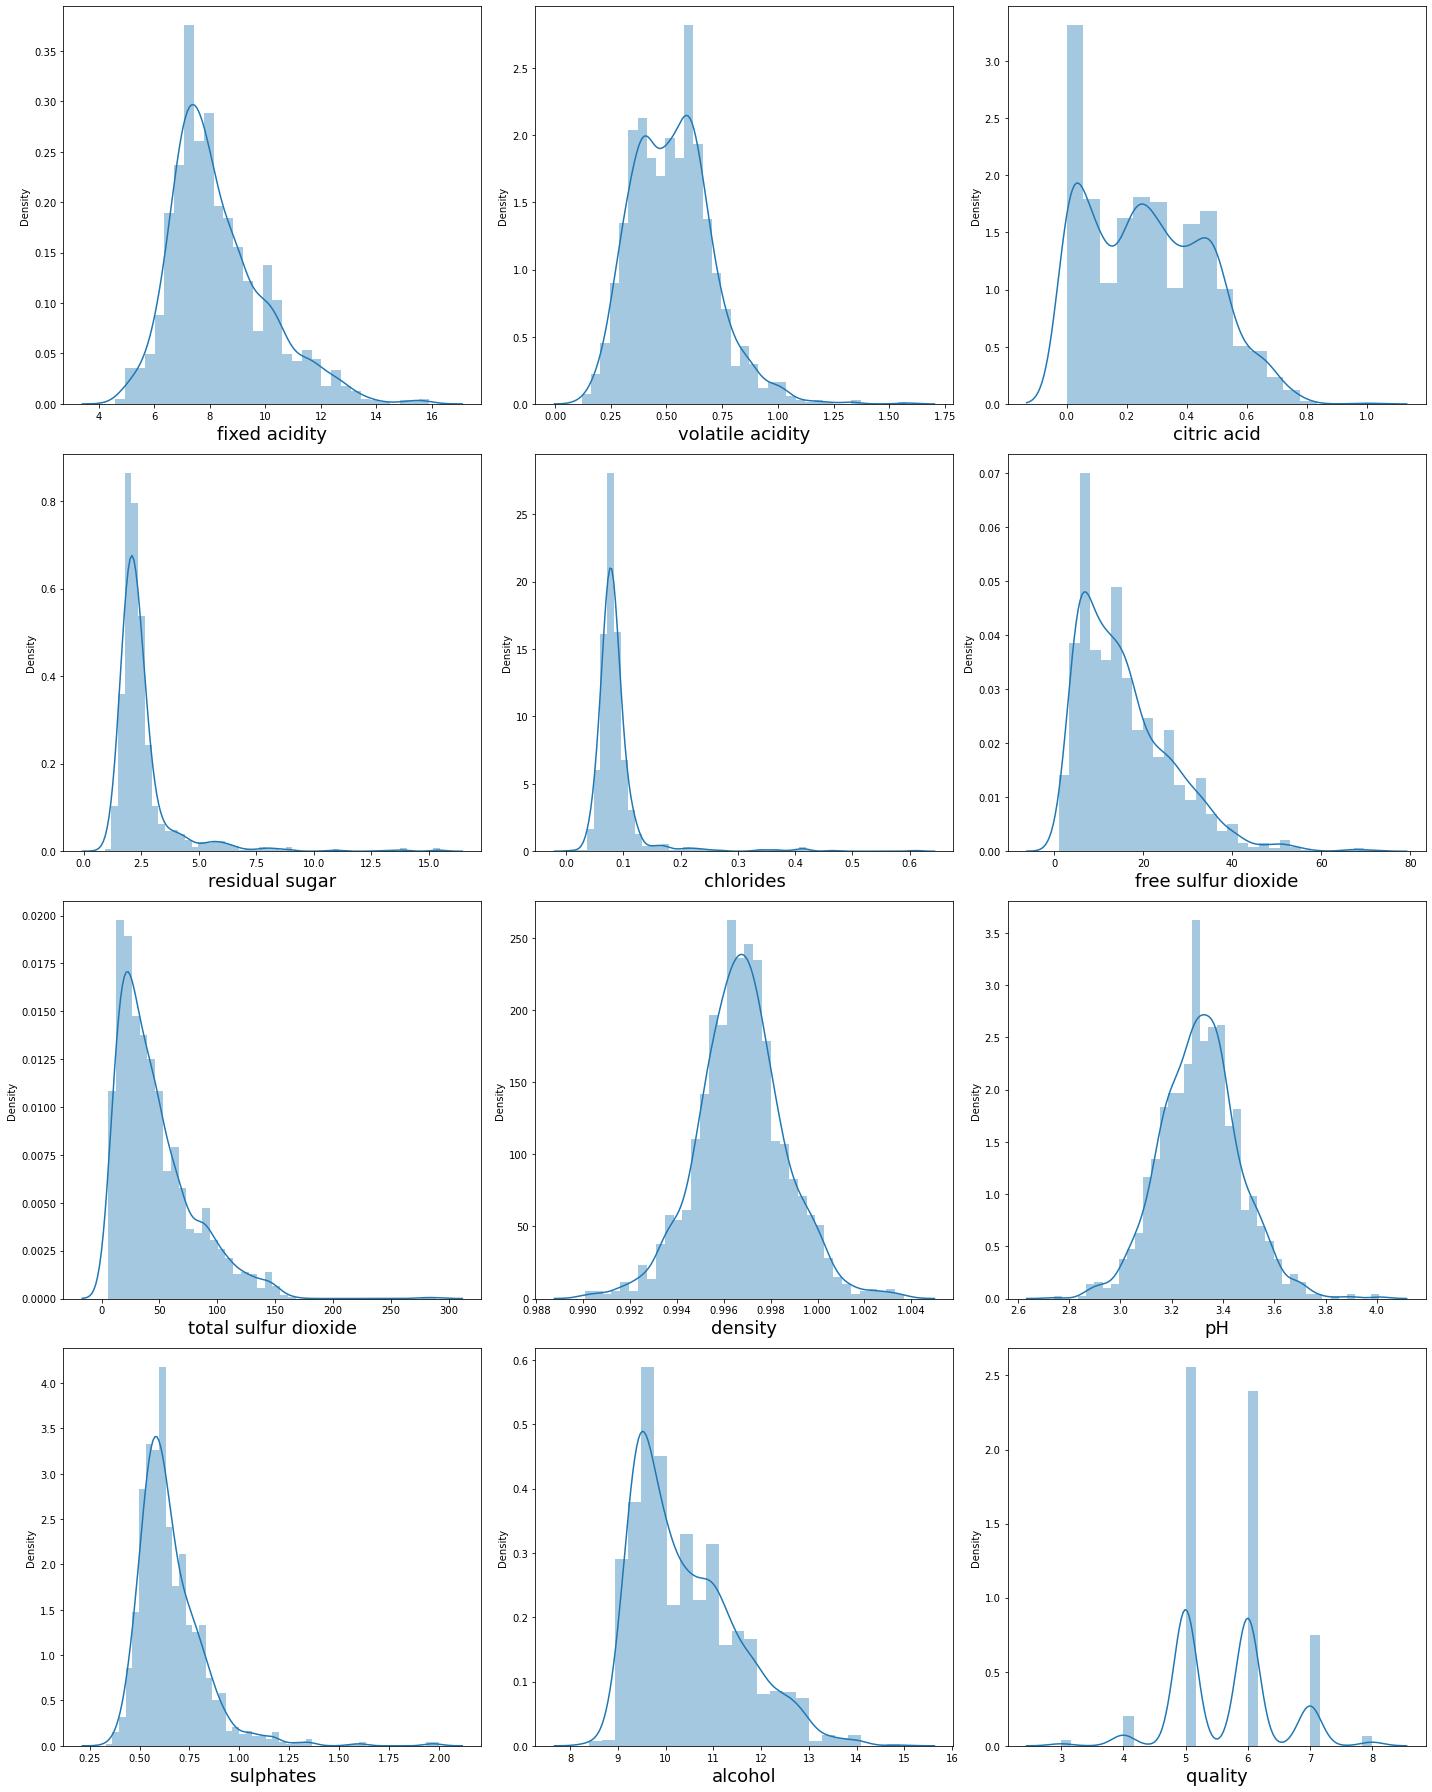

In [9]:
# Let' see how data is distributed in every columns.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()
            

### Spliting Dataset into features and labels

In [3]:
x = df.drop('quality', axis = 1)
y = df.quality


Relationship Plot :-



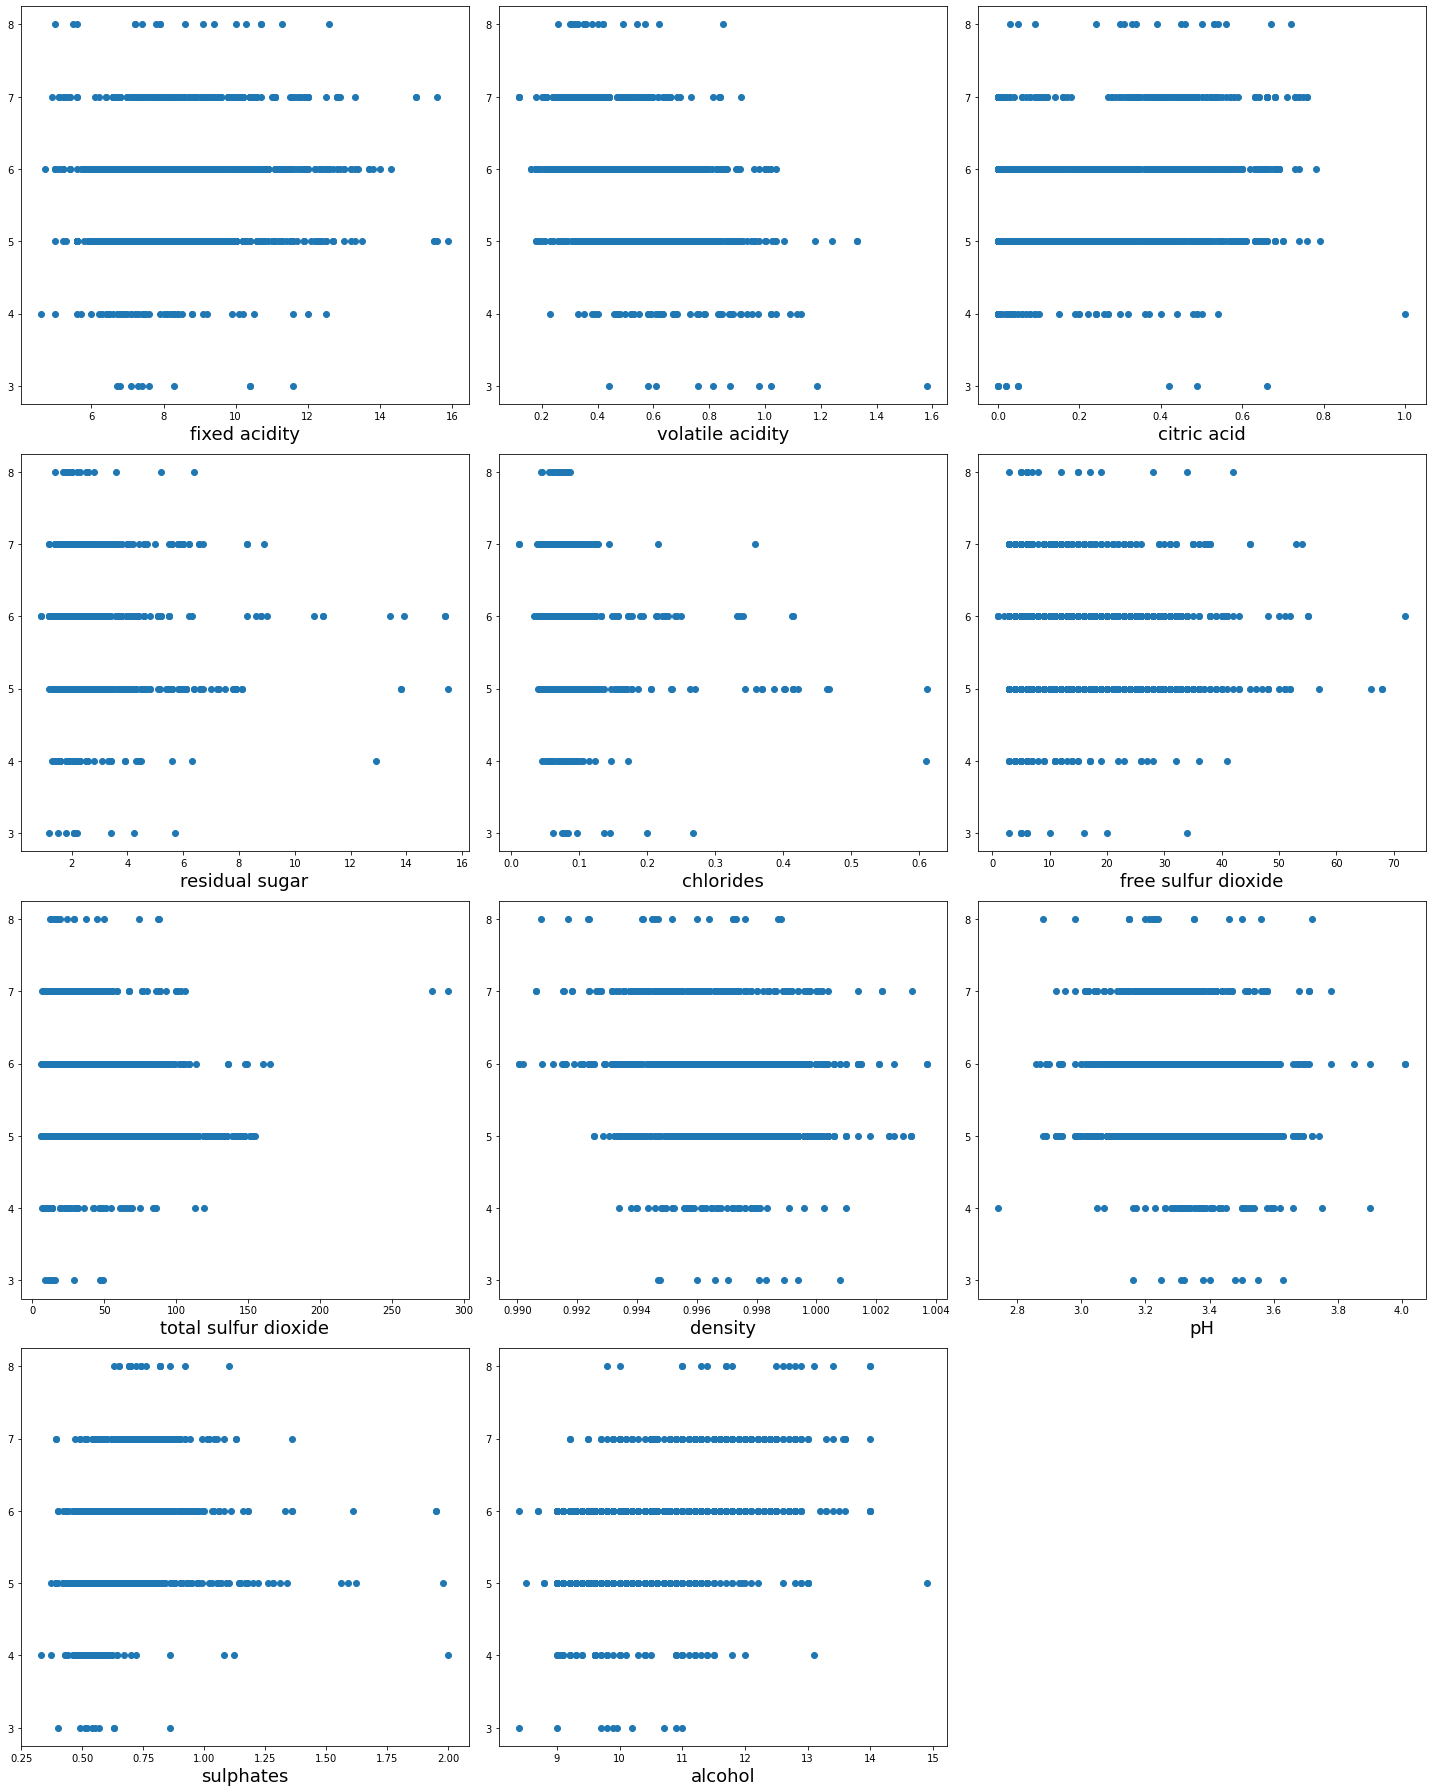

In [11]:
# Let' see how data is related to label .
print('\nRelationship Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

### Heat Map

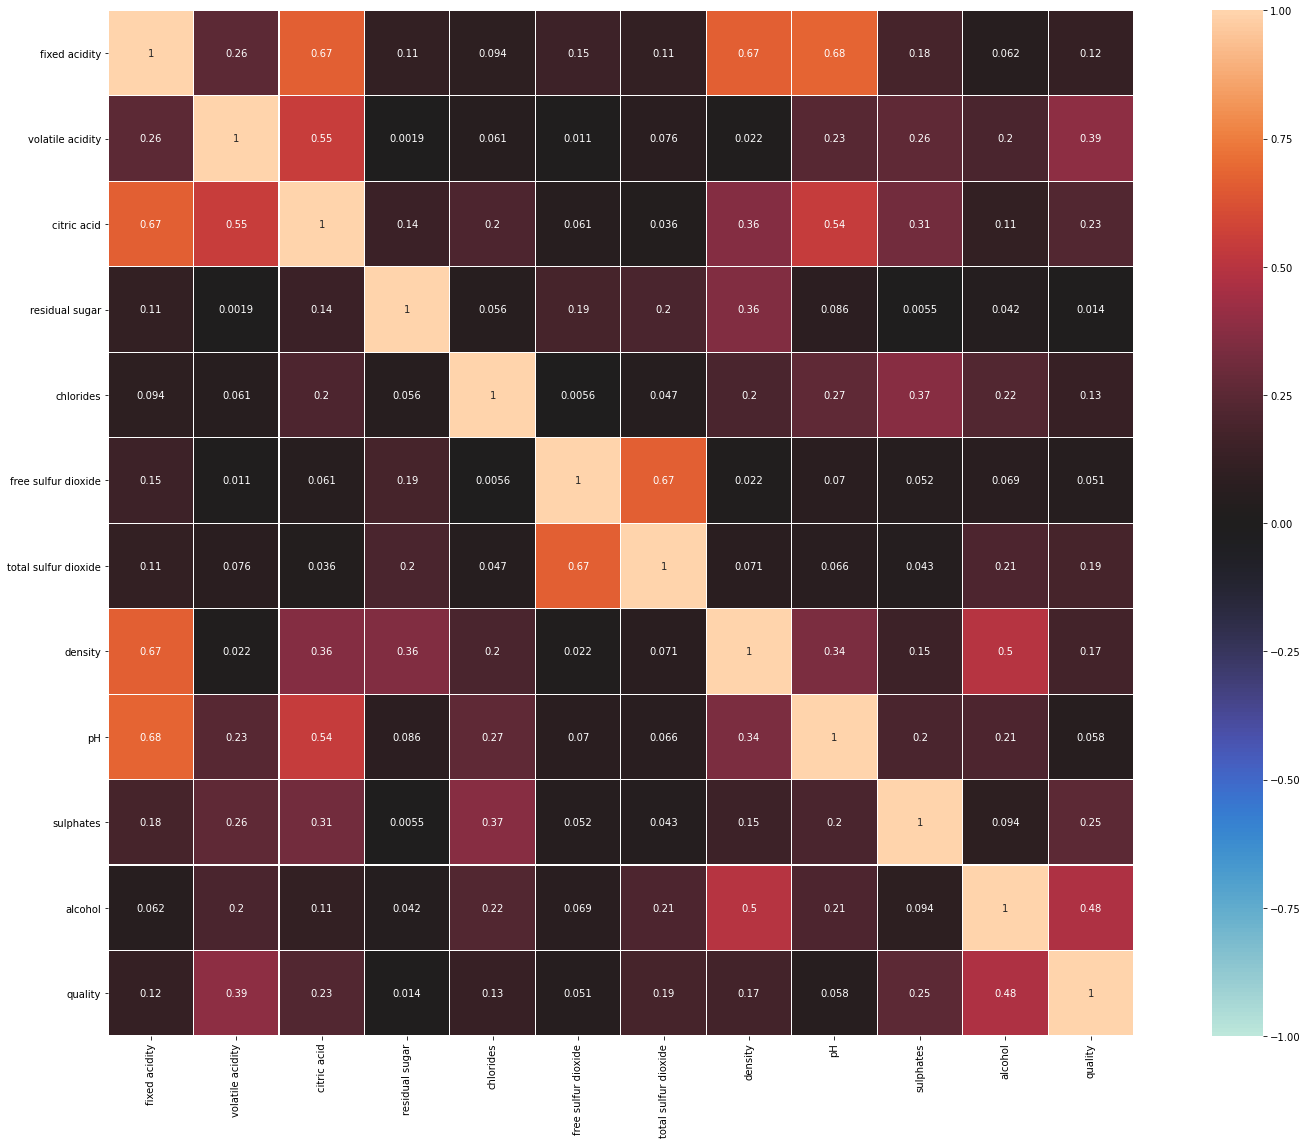

In [12]:
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

Obsetvation : Some features shows strong corelation with label.

### Checking Outliers

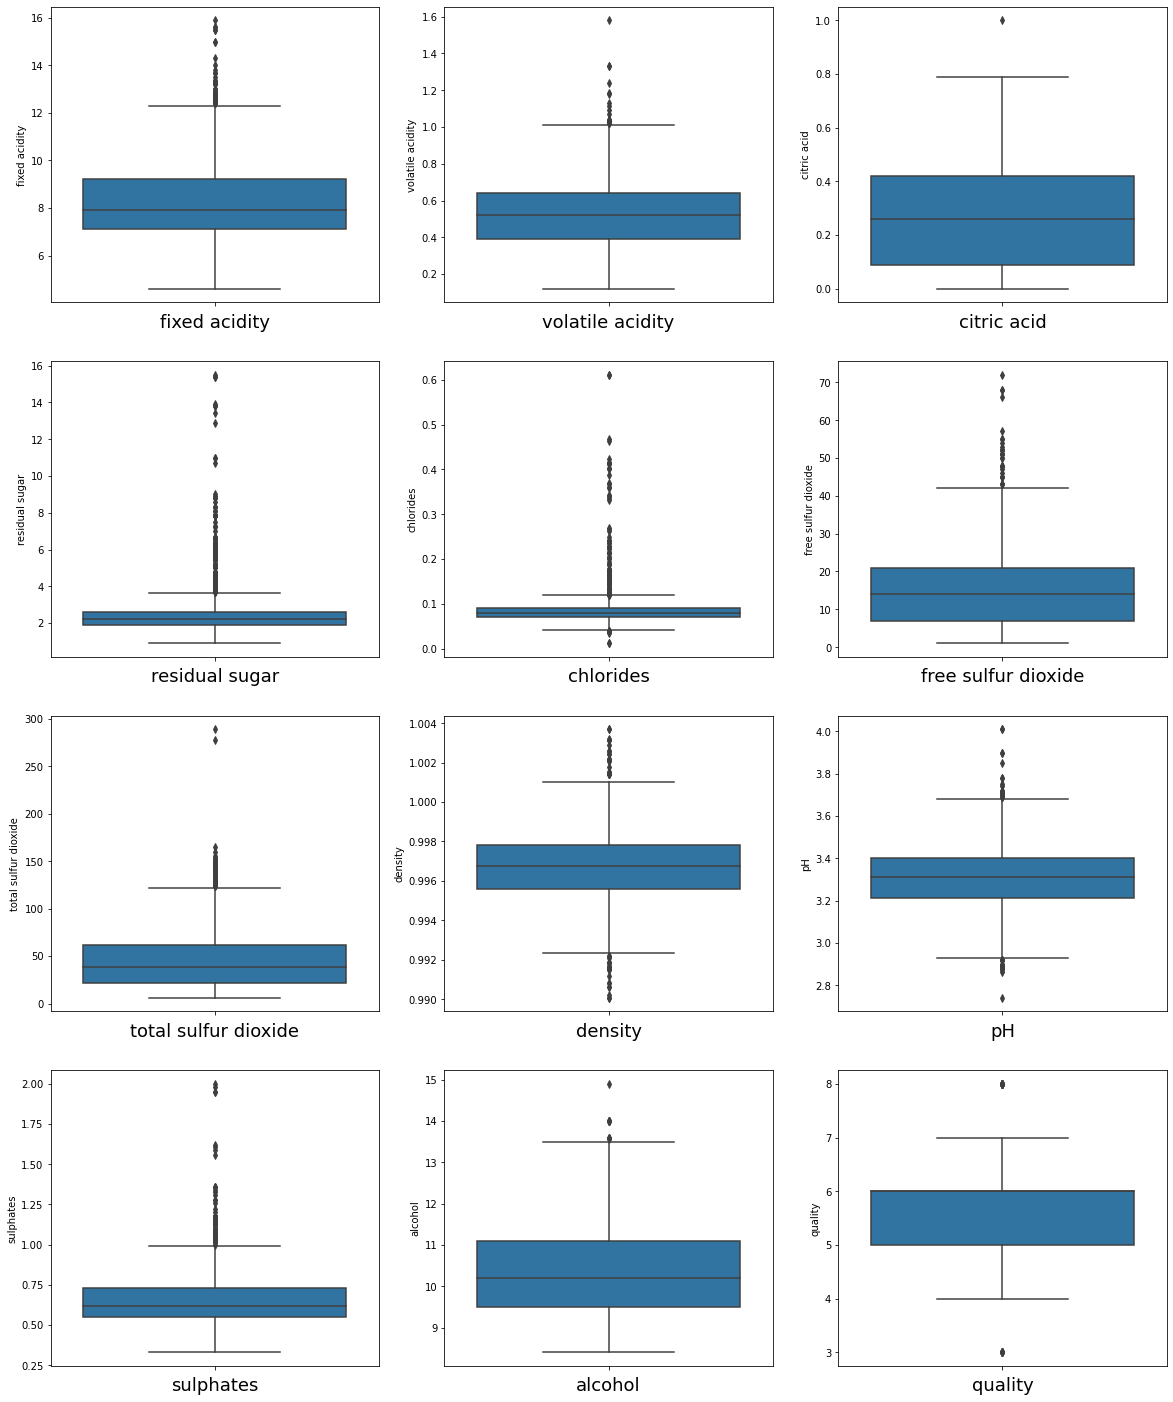

In [13]:
# Visualize the outliers using boxplot
plt.figure(figsize = (20,25))
graph = 1

for column in df:
    if graph <=12:
        ax = plt.subplot(4,3, graph)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    graph +=1
plt.show()

There are outliers presents in dataset.

### Removing Outliers

In [4]:
# with std 3 Lets see the stats

z_score = zscore(df[['alcohol', 'sulphates', 'pH', 'density', 'total sulfur dioxide', 'free sulfur dioxide','chlorides', 'residual sugar', 'citric acid','volatile acidity','fixed acidity']]) # use only continous data
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]


Distribution Plot :-



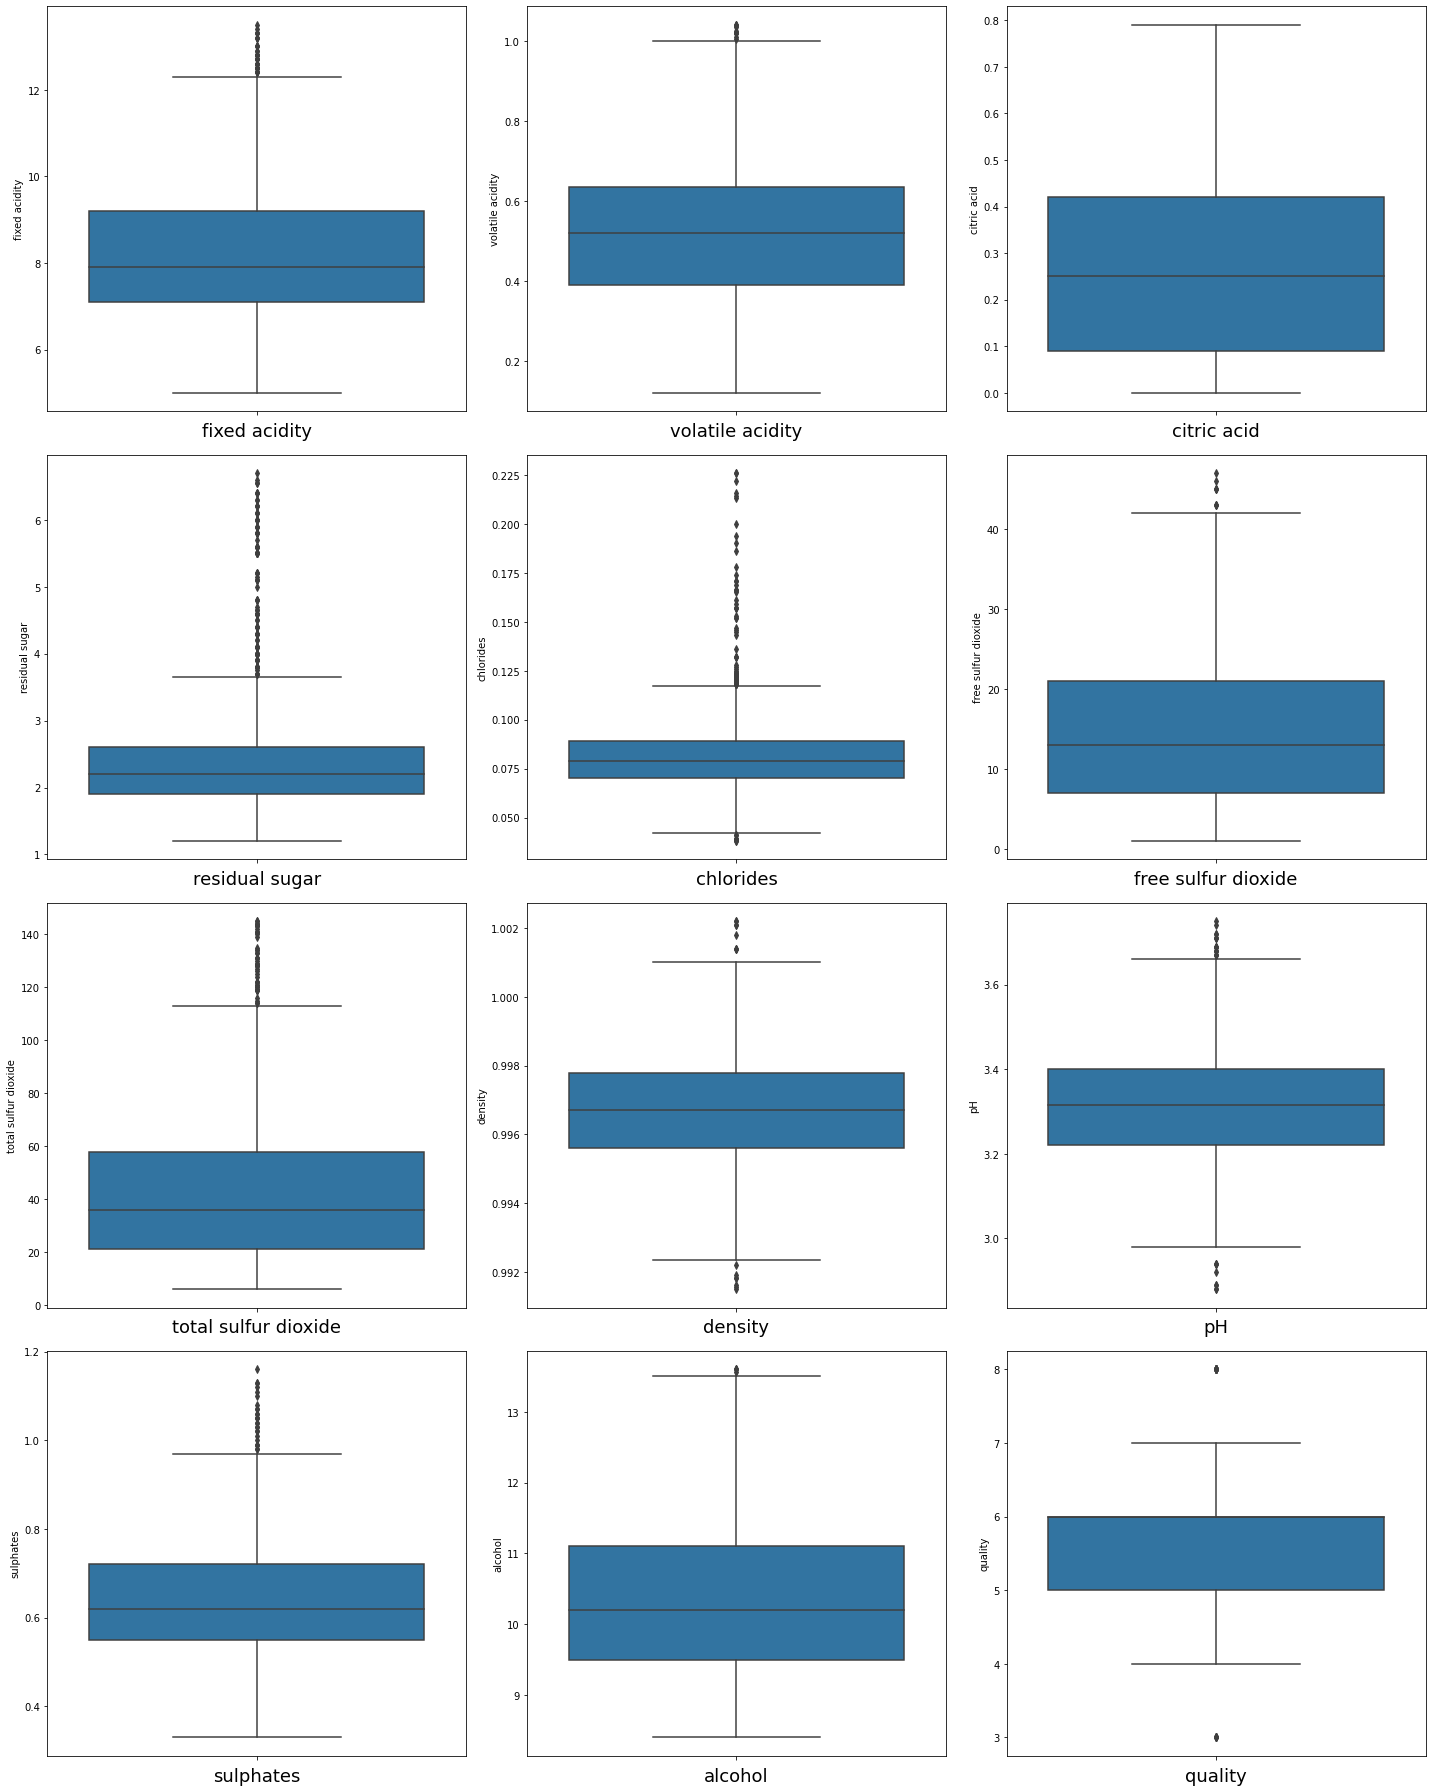

In [15]:
# Let' see outliers are removed in columns or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

In [16]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

After using zscore for removing outliers but some outliers left in dataset. Lets use quntile metthod to remove remaning outliers and skewness.

In [5]:
# we are removing the top 5% data from the fixed acidityl column
q = df['fixed acidity'].quantile(0.95)
data_cleaned = df[df['fixed acidity']<q]
# we are removing the top 2% data from the volatile acidity column
q = df['volatile acidity'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['volatile acidity']<q]
# we are removing the top 10% data from the residual sugar column
q = df['residual sugar'].quantile(0.90)
data_cleaned = data_cleaned[data_cleaned['residual sugar']<q]
# we are removing the top 10% data from the chlorides column
q = df['chlorides'].quantile(0.90)
data_cleaned = data_cleaned[data_cleaned['chlorides']<q]
# we are removing the top 5% data from the free sulfur dioxide column
q = df['free sulfur dioxide'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['free sulfur dioxide']<q]
# we are removing the top 5% data from the total sulfur dioxide column
q = df['total sulfur dioxide'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['total sulfur dioxide']<q]
# we are removing the top 10% data from the sulphates column
q = df['sulphates'].quantile(0.90)
data_cleaned = data_cleaned[data_cleaned['sulphates']<q]
# we are removing the top 5% data from the alcohol column
q = df['alcohol'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['alcohol']<q]


Distribution Plot :-



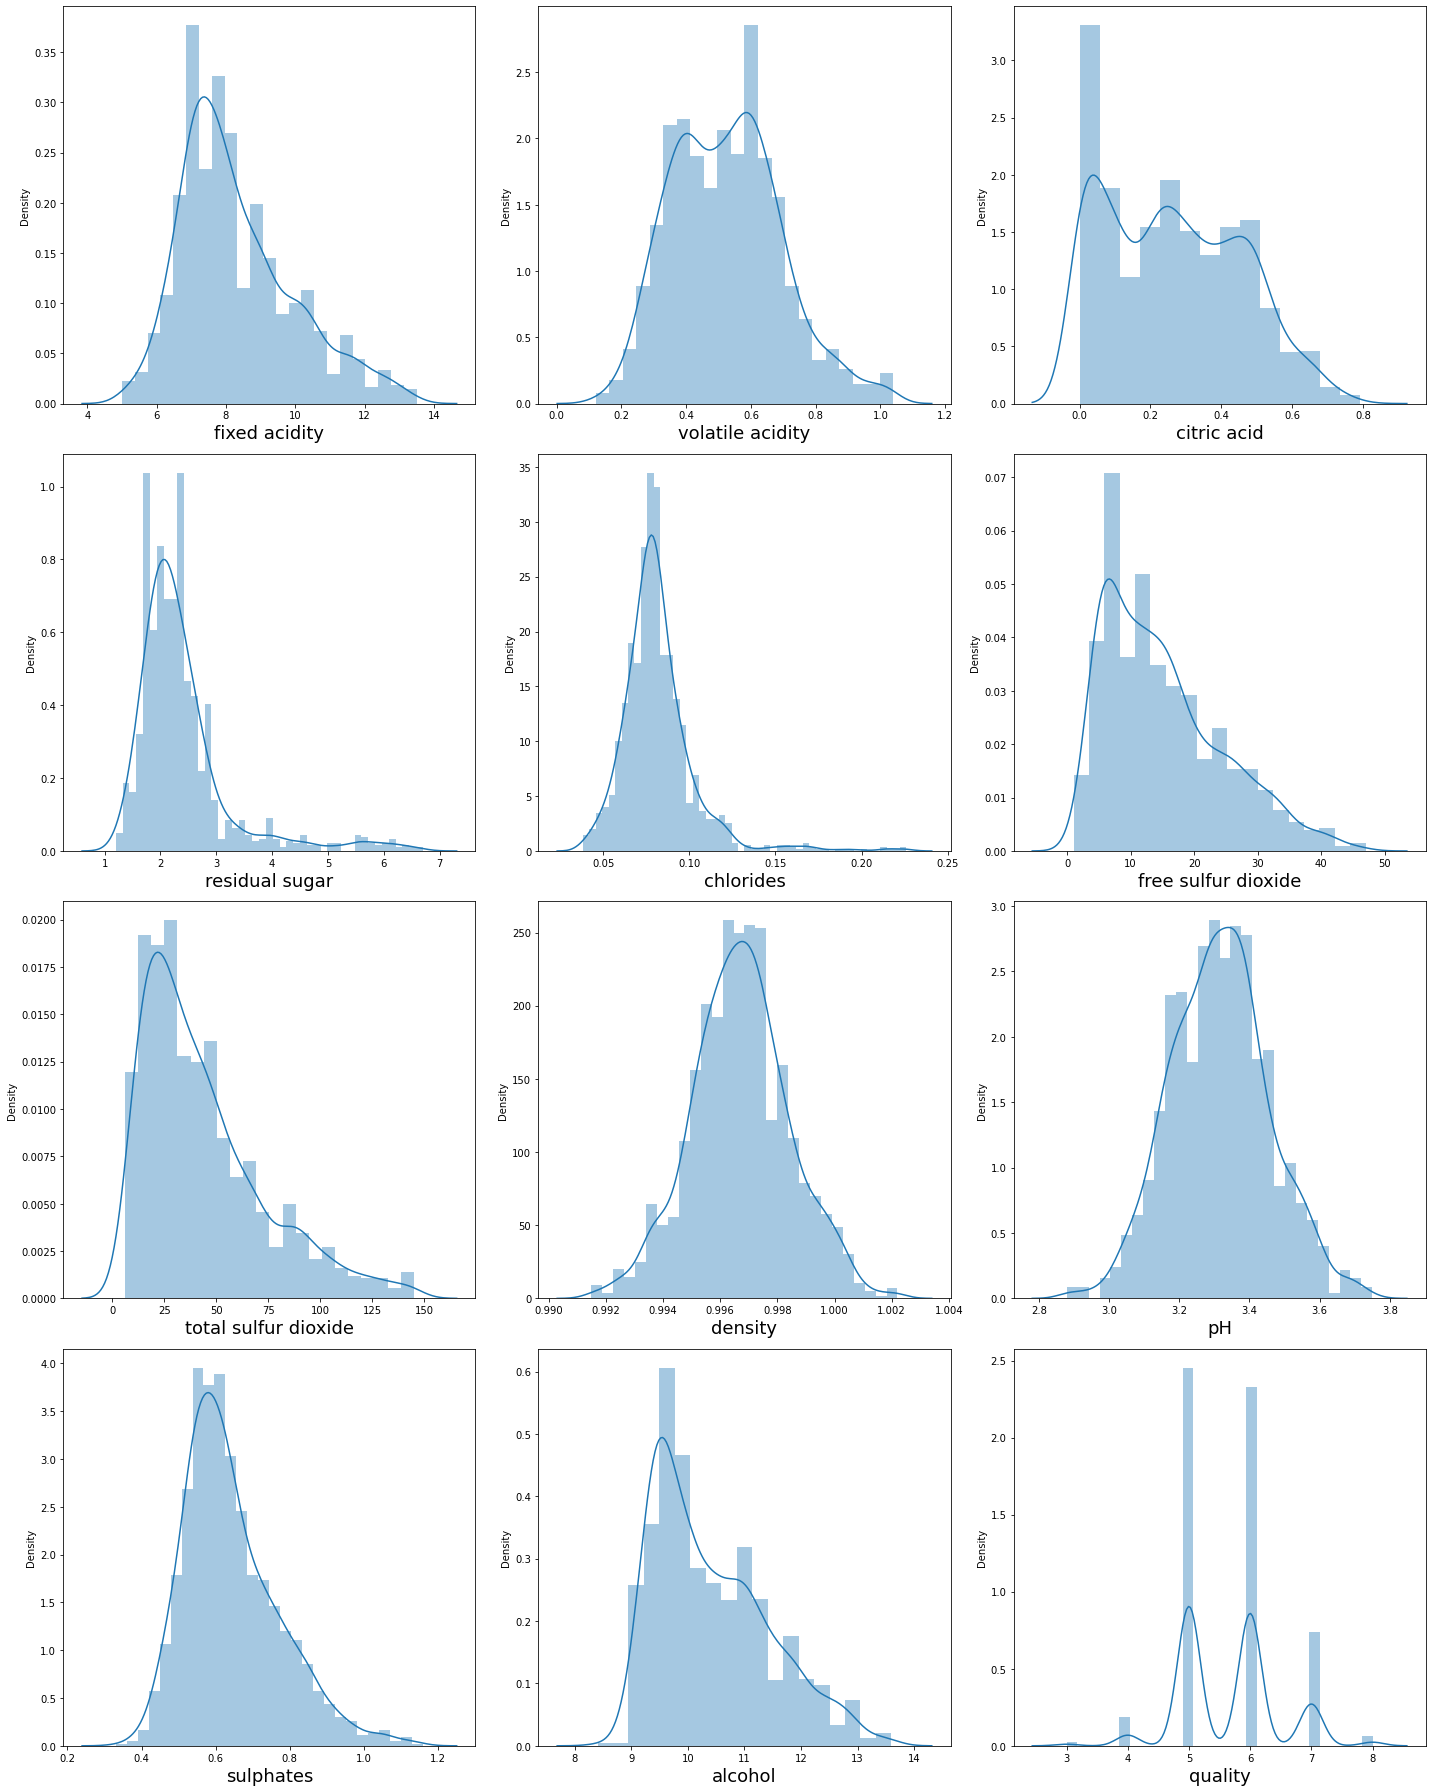

In [18]:
# Let' see outliers are removed in columns or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### It removes outliers.

In [19]:
df.shape # Here we check shape of remaining data after removal of outliers.

(1458, 12)

### Data Scaling

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [7]:
df1 = pd.DataFrame(x_scaled)
df1

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


### Checking Multicollinearity present in our dataset we use VIF

In [8]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Vif'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif

,Features,Vif
0,fixed acidity,7.767512
1,volatile acidity,1.789390
2,citric acid,3.128022
3,residual sugar,1.702588
4,chlorides,1.481932
5,free sulfur dioxide,1.963019
6,total sulfur dioxide,2.186813
7,density,6.343760
8,pH,3.329732
9,sulphates,1.429434


### Handling Class Imbalance

In [9]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x, y)

In [10]:
y_over.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

### Split data into train and test. Model will be bulit on training data and tested on test data.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


### Model Building

### Decision Tree model instantiaing, training and evaluating

In [26]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [27]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')


-----------------------------------------------------------

Confusion Matrix :
[[155   2   5   1   0   0]
 [  2 160  16  12   2   0]
 [  3  11 113  23   8   2]
 [  1   7  34  97  35   8]
 [  0   1   5  15 139   3]
 [  0   0   1   3   8 150]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           3       0.96      0.95      0.96       163
           4       0.88      0.83      0.86       192
           5       0.65      0.71      0.68       160
           6       0.64      0.53      0.58       182
           7       0.72      0.85      0.78       163
           8       0.92      0.93      0.92       162

    accuracy                           0.80      1022
   macro avg       0.80      0.80      0.80      1022
weighted avg       0.80      0.80      0.79      1022

------------------------------------------------------------



#### Conclusion : Decision Tree model has 80% score 

### ROC, AUC Curve

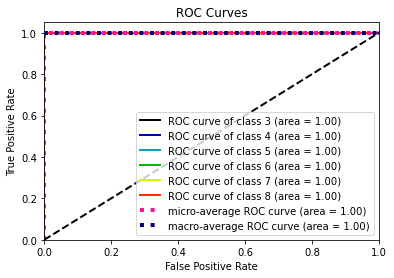

In [28]:
prob = DT.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### Cross Validation score to check if the model is overfitting

In [29]:
cv = cross_val_score(DT, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.4821649686520376


#### Conclusion : Decision Tree model has 48% Cross Validation score

### Knn model instantiaing, training and evaluating


In [30]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [31]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[152   5   6   0   0   0]
 [ 16 162   9   2   2   1]
 [ 14  19  74  35  11   7]
 [ 13  27  42  55  28  17]
 [  5   2   4  14 131   7]
 [  1   3   1  11  14 132]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           3       0.76      0.93      0.84       163
           4       0.74      0.84      0.79       192
           5       0.54      0.46      0.50       160
           6       0.47      0.30      0.37       182
           7       0.70      0.80      0.75       163
           8       0.80      0.81      0.81       162

    accuracy                           0.69      1022
   macro avg       0.67      0.69      0.68      1022
weighted avg       0.67      0.69      0.67      1022

------------------------------------------------------------


#### Conclusion : Knn model has 69% score

### ROC, AUC Curve

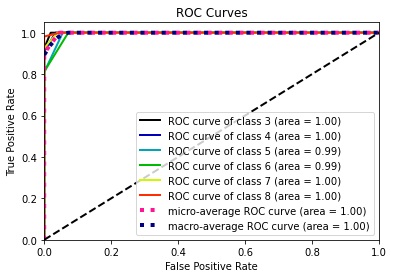

In [32]:
prob = Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### Cross Validation score to check if the model is overfitting

In [33]:
cv = cross_val_score(Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.4421473354231975


#### Conclusion : Knn model has 44% Cross Validation score 

### Random Forest model instantiaing, training and evaluating

In [34]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [35]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[163   0   0   0   0   0]
 [  2 183   6   1   0   0]
 [  2  15 118  20   5   0]
 [  1   5  43  97  31   5]
 [  0   0   5  11 145   2]
 [  0   0   0   0   5 157]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       163
           4       0.90      0.95      0.93       192
           5       0.69      0.74      0.71       160
           6       0.75      0.53      0.62       182
           7       0.78      0.89      0.83       163
           8       0.96      0.97      0.96       162

    accuracy                           0.84      1022
   macro avg       0.84      0.85      0.84      1022
weighted avg       0.84      0.84      0.84      1022

------------------------------------------------------------


#### Conclusion : Random Forest model has 84% score .


### ROC, AUC Curve

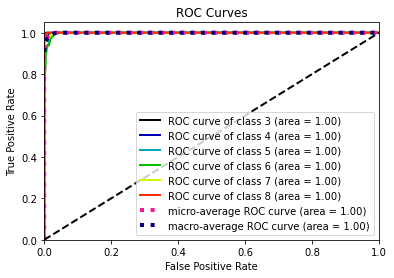

In [36]:
prob = Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### Cross Validation score to check if the model is overfitting

In [37]:
cv = cross_val_score(Rn, x, y, cv = 5)
print('Cross Validation score of Random Forest model --->', cv.mean())

Cross Validation score of Random Forest model ---> 0.5816398902821316


#### Conclusion : Random Forest model has 58% Cross Validation score

### Logistic Regression model instantiaing, training and evaluating

In [14]:
Lr = LogisticRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [15]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[125  25   6   7   0   0]
 [ 38  83  51  16   4   0]
 [ 27  31  68  17  12   5]
 [ 10  24  41  49  29  29]
 [  5   3   6  34  50  65]
 [  0   0   0   0  56 106]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           3       0.61      0.77      0.68       163
           4       0.50      0.43      0.46       192
           5       0.40      0.42      0.41       160
           6       0.40      0.27      0.32       182
           7       0.33      0.31      0.32       163
           8       0.52      0.65      0.58       162

    accuracy                           0.47      1022
   macro avg       0.46      0.48      0.46      1022
weighted avg       0.46      0.47      0.46      1022

------------------------------------------------------------


#### Conclusion :Logistic Regression model has 47% score 

### ROC, AUC Curve

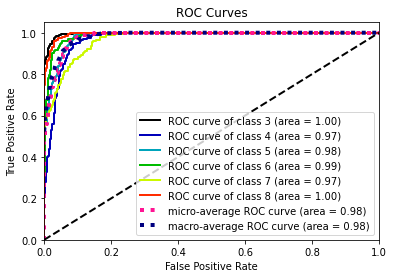

In [16]:
prob = Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob)
plt.show()

### Cross Validation score to check if the model is overfitting

In [17]:
cv = cross_val_score(Lr, x, y, cv = 5)
print('Cross Validation score of Logistic Regression model --->', cv.mean())

Cross Validation score of Logistic Regression model ---> 0.5747492163009404


#### Conclusion : Logistic Regression model has 57% Cross Validation score

### Looking CV score we found Logistic RegressionSVC has best model so we do Hyperparameter Tuning on it.

In [28]:
grid_param = { 'max_iter':[100],'penalty': ['l2','l2']}

In [29]:
grid_search = GridSearchCV(estimator = Lr, param_grid = grid_param, cv = 5,n_jobs = -1 )

In [30]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100], 'penalty': ['l2', 'l2']})

In [27]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_iter': 100, 'penalty': 'l2'}


In [33]:
hlr = LogisticRegression(max_iter = 100, penalty = 'l2')
hlr.fit(x_train, y_train)
hlr.score(x_test, y_test)

0.4706457925636008

In [34]:
y_pred = hlr.predict(x_test)

In [35]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[125  25   6   7   0   0]
 [ 38  83  51  16   4   0]
 [ 27  31  68  17  12   5]
 [ 10  24  41  49  29  29]
 [  5   3   6  34  50  65]
 [  0   0   0   0  56 106]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           3       0.61      0.77      0.68       163
           4       0.50      0.43      0.46       192
           5       0.40      0.42      0.41       160
           6       0.40      0.27      0.32       182
           7       0.33      0.31      0.32       163
           8       0.52      0.65      0.58       162

    accuracy                           0.47      1022
   macro avg       0.46      0.48      0.46      1022
weighted avg       0.46      0.47      0.46      1022

------------------------------------------------------------


### After Hyperparameter Tuning model accuracy score 47% 

### Saving The Model

In [36]:
# saving the model to the Local file system
filename = 'hlr_redwine.pickle'
pickle.dump(hlr, open(filename, 'wb'))